In [2]:
import numpy as np
import scipy as sc
import sympy as sp
import matplotlib.pyplot as plt

# Vetor dos valores de escorregamento
sVect = np.linspace(1e-3, 1, 1000)

def F_to_Ns(Poles, freqMotor):
    '''
    Funcao que retorna a velocidade
    de rotação do campo
    magnetomotriz

    Parameters:
        Poles: Quantidade de Polos do motor
        freqMotor: Frequencia do motor

    Returns:
        A conversão em RPM.
    '''
    return ( 2 / Poles * freqMotor * 60)

def Rad_to_Deg(rad):
    return (rad * 180. / np.pi)

def Deg_to_Rad(deg):
    return (deg * np.pi / 180.)

# Correntes no Estator e Rotor

n = 1715 RPM
wn = 179.5943800302165 rad/s

ws = 188.49555921538757 rad/s
ns = 1800.0 RPM

s = 0.04722222222222222
Zs = (5.877680187432147+5.8736314180269105j)

Is max = 14.20054133819864
Irmax = 13.905333585439331

Tpartida = 13.078920067516753

smax = 0.3186852736268993
RPM em smax = 1226.3665074715814 RPM
Tmax = 19.51530981512811 N.m
Tnominal = 7.351961400322337



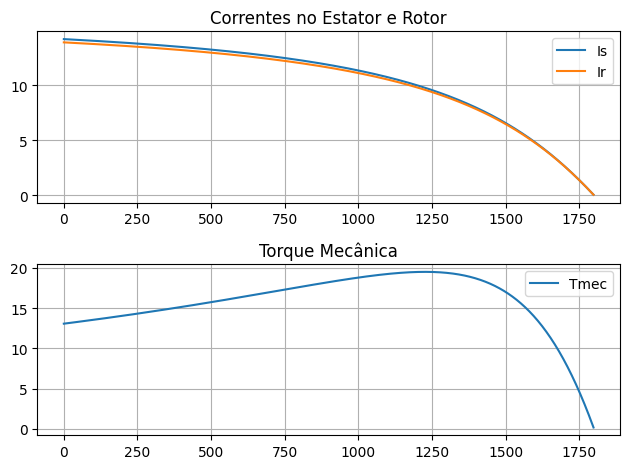

In [ ]:
import numpy as np
from numpy import pi
import scipy as sc
import sympy as sp
import matplotlib.pyplot as plt

# Vetor dos valores de escorregamento
sVect = np.linspace(1e-3, 1, 1000)

Rs = 6.4 #Ohm
Xls = 5.85 #Ohm
Rr = 4.25 #Ohm
Xlr = 5.85 #Ohm
Xm = 137.8 #Ohm

Polos = 4

fs = 60 #Hz

# Vs = 220 * np.sqrt(3) #V
Vs = 220
Vl = Vs

n = 1715 # RPM
wn = n * 2 * pi / 60 # Velocidade do rotor (rad/s)
print(f'n = {n} RPM')
print(f'wn = {wn} rad/s\n')

ws = fs * 2 * pi * (2 / Polos)# rad/s
print(f'ws = {ws} rad/s')

ns = F_to_Ns(Polos, fs)
print(f'ns = {ns} RPM\n')

s = (ns - n) / ns
print(f's = {s}')

# Impedancia do estator
# Usando a simplificação pelo teorema
# de Thevenin
Zs = (1j * Xm * (Rs + 1j * Xls)) / (Rs + 1j * Xls + 1j*Xm)
print(f'Zs = {Zs}')
print()

# Impedancia Rotor
Zr = Rr / sVect + 1j*(Xlr)
# print(f'Zr = {np.Zr}')

# Impedancia de entrada
Z = Zs + Zr
# print(f'Z = {Z}')

Is = Vs / np.abs(Z)
Ismax = np.max(Is)
print(f'Is max = {Ismax}')

# Corrente no rotor
Ir = Vs / (Rs + Rr / sVect + 1j*(Xls+Xlr))
Irmax =  Vs / (Rs + Rr / 1 + 1j*(Xls+Xlr))
print(f'Irmax = {np.abs(Irmax)}')

print()

# Curva de torque
Tmec = (3 / ws) * ((Vs**2) / ((Rs + Rr / sVect) + 1j*(Xls+Xlr))**2) * (Rr/sVect)

sPartida = 1
Tpartida = np.abs((3 / ws) * ((Vs**2) / ((Rs + Rr / sPartida) +
                                         1j*(Xls+Xlr))**2) * (Rr / sPartida))
print(f'Tpartida = {Tpartida}\n')

smax = Rr / np.sqrt(Rs**2 + (Xls+Xlr)**2)
Tmax = np.abs((3 / ws) * ((Vs**2) / ((Rs + Rr / smax) +
                                     1j*(Xls+Xlr))**2) * (Rr / smax))
print(f'smax = {smax}')
print(f'RPM em smax = {(1-smax)*ns} RPM')
print(f'Tmax = {Tmax} N.m')

Tnominal = (3 / ws) * ((Vs**2) / ((Rs + Rr / s) + 1j*(Xls+Xlr))**2) * (Rr/s)
print(f'Tnominal = {np.abs(Tnominal)}')

print()

fig = plt.figure()
fig01 = fig.add_subplot(211)
fig02 = fig.add_subplot(212)

fig01.set_title("Correntes no Estator e Rotor")
fig01.plot((1-sVect)*ns, np.abs(Is), label="Is")
fig01.plot((1-sVect)*ns, np.abs(Ir), label="Ir")
fig01.legend()
fig01.grid()

fig02.set_title("Torque Mecânica")
fig02.plot((1-sVect)*ns, np.abs(Tmec), label="Tmec")
fig02.legend()
fig02.grid()

fig.tight_layout()

# Controle De Velocidade de um Motor de Indução

## Variando a tensão do estator

Com haja mudança na tensão de aremadura (tensão aplicada
no estator) a variação de torque será proporcional ao quadrado:

$ T_{mec} \propto V_s^2 $


fs = 60 Hz
ws = 376.99111843077515 rad/s

rpm = 1715 RPM
wm = 179.5943800302165 rad/s

ns (velocidade sincrona) = 1800.0 RPM
s = 0.04722222222222222



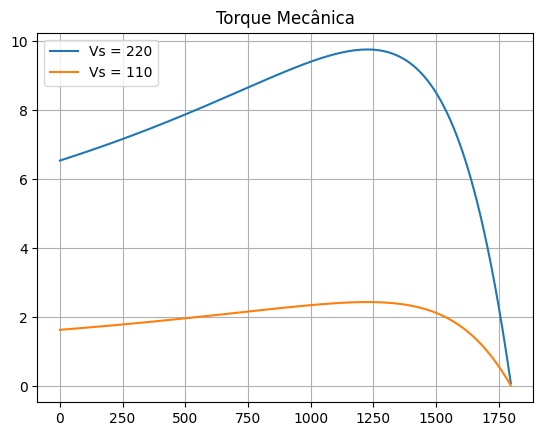

In [103]:
import numpy as np
from numpy import pi
import scipy as sc
import sympy as sp
import matplotlib.pyplot as plt

# Vetor dos valores de escorregamento
sVect = np.linspace(1e-3, 1, 1000)

Rs = 6.4 #Ohm
Xls = 5.85 #Ohm
Rr = 4.25 #Ohm
Xlr = 5.85 #Ohm
Xm = 137.8 #Ohm

Polos = 4

fs = 60
ws = fs * 2 * pi
print(f'fs = {fs} Hz')
print(f'ws = {ws} rad/s')
print()

# Vs = 220 * np.sqrt(3) #V
Vs = np.array([220, 110])
Vl = Vs

rpm = 1715
wm = rpm * 2 * pi / 60 # Velocidade do rotor (rad/s)
print(f'rpm = {rpm} RPM')
print(f'wm = {wm} rad/s\n')

ns = F_to_Ns(Polos, fs)
s = (ns - rpm) / ns
print(f'ns (velocidade sincrona) = {ns} RPM')
print(f's = {s}')
print()

Tmec = np.zeros((len(Vs), len(sVect)))
# Curva de torque
for i in range(len(Vs)):
    Tmec[i] = np.abs((3 / ws) * ((Vs[i]**2) / ((Rs + Rr / sVect) + 1j*(Xls+Xlr))**2) * (Rr/sVect))

plt.title("Torque Mecânica")
plt.plot((1-sVect)*ns, np.abs(Tmec[0]), label=f"Vs = {Vs[0]}")
plt.plot((1-sVect)*ns, np.abs(Tmec[1]), label=f"Vs = {Vs[1]}")
plt.legend()
plt.grid()

plt.show()

n = 1715 RPM
wn = 179.5943800302165 rad/s

ws = [188.49555922  94.24777961  47.1238898 ] rad/s
ns = [1800.  900.  450.] RPM

s = [ 0.04722222 -0.90555556 -2.81111111]


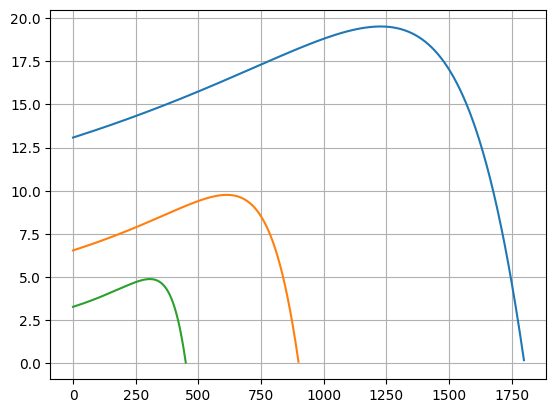

In [54]:
import numpy as np
from numpy import pi
import scipy as sc
import sympy as sp
import matplotlib.pyplot as plt

# Vetor dos valores de escorregamento
sVect = np.linspace(1e-3, 1, 1000)

Rs = 6.4 #Ohm
Xls = 5.85 #Ohm
Rr = 4.25 #Ohm
Xlr = 5.85 #Ohm
Xm = 137.8 #Ohm

Polos = 4

fs = np.array([60,30,15]) #Hz

# Vs = 220 * np.sqrt(3) #V
Vs = 220
Vs = (fs / fs[0]) * Vs
Vl = Vs

n = 1715 # RPM
wn = n * 2 * pi / 60 # Velocidade do rotor (rad/s)
print(f'n = {n} RPM')
print(f'wn = {wn} rad/s\n')

ws = fs * 2 * pi * (2 / Polos)# rad/s
print(f'ws = {ws} rad/s')

ns = F_to_Ns(Polos, fs)
print(f'ns = {ns} RPM\n')

s = (ns - n) / ns
print(f's = {s}')


Tmec = np.zeros((3, len(sVect)))
# Curva de torque
for i in range(len(ws)):
    Tmec[i] = np.abs((3 / ws[i]) * ((Vs[i]**2) / ((Rs + Rr / sVect) + 1j*(Xls+Xlr))**2) * (Rr/sVect))

plt.plot((1-sVect)*ns[0], np.abs(Tmec[0]))
plt.plot((1-sVect)*ns[1], np.abs(Tmec[1]))
plt.plot((1-sVect)*ns[2], np.abs(Tmec[2]))

plt.grid()

plt.show()

# Transformação $\alpha \beta$

## Referência: ESTATOR

fs = 60 Hz
ws = 376.99111843077515 rad/s

Matriz de Transformação Bifásica:
[[ 1.         -0.5        -0.5       ]
 [ 0.          0.8660254  -0.8660254 ]
 [ 0.22222222  0.22222222  0.22222222]]


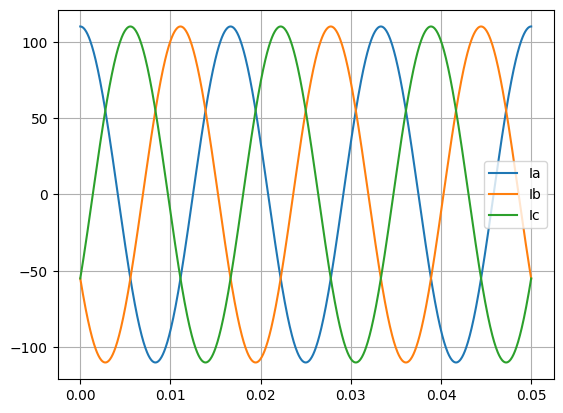

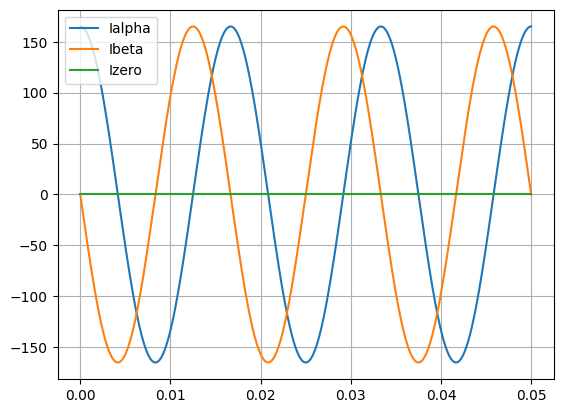

In [5]:
import numpy as np
from numpy import pi
import scipy as sc
import sympy as sp
import matplotlib.pyplot as plt

timeVect = np.linspace(0, 0.05, 1000)
fs = 60 #Hz (rede eletrica)
ws = 2 * pi * fs # rad/s

print(f'fs = {fs} Hz')
print(f'ws = {ws} rad/s')
print()

Ia = Ib = Ic = 110 #A
ias = Ia*np.cos(ws*timeVect)
ibs = Ib*np.cos(ws*timeVect + Deg_to_Rad(120))
ics = Ic*np.cos(ws*timeVect - Deg_to_Rad(120))

fig = plt.figure()
fig01 = fig.add_subplot()

fig01.plot(timeVect, ias, label="Ia")
fig01.plot(timeVect, ibs, label="Ib")
fig01.plot(timeVect, ics, label="Ic")
fig01.legend()
fig01.grid()

fig.show()

# Matriz de transformação bifasica

k = 2 / 3

T32 = np.array([
    [1, -1/2, -1/2],
    [0, np.sqrt(3)/2, -np.sqrt(3)/2],
    [1/3*k, 1/3*k, 1/3*k]
])

T32_2 = np.array([
    [1/np.sqrt(2), 1/np.sqrt(2), 1/np.sqrt(2)],
    [1, -1/2, -1/2],
    [0, np.sqrt(3)/2, -np.sqrt(3)/2]
])

print(f'Matriz de Transformação Bifásica:\n{T32}')

Ivect = np.array([
    ias,
    ibs,
    ics
])

ivec_AlphaBeta = T32 @ Ivect

# print(np.max(ivec_AlphaBeta[1,:]))

fig = plt.figure()
fig01 = fig.add_subplot()

fig01.plot(timeVect, ivec_AlphaBeta[0,:], label="Ialpha")
fig01.plot(timeVect, ivec_AlphaBeta[1,:], label="Ibeta")
fig01.plot(timeVect, ivec_AlphaBeta[2,:], label="Izero")
fig01.legend()
fig01.grid()

fig.show()

# CHATGPT

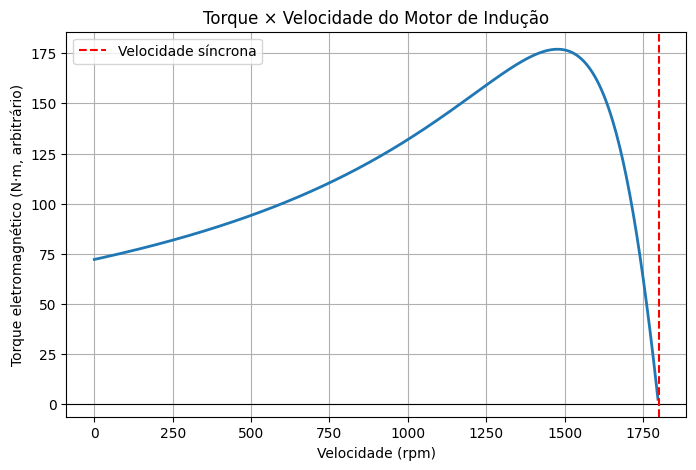

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do motor (exemplo)
V1 = 220        # tensão de fase (V)
R1 = 0.5        # resistência do estator (ohm)
X1 = 1.0        # reatância do estator (ohm)
R2 = 0.3        # resistência do rotor referida ao estator (ohm)
X2 = 0.6        # reatância do rotor referida ao estator (ohm)
f = 60          # frequência da rede (Hz)
P = 4           # número de polos

# Velocidade síncrona
Ns = 120 * f / P          # rpm
ws = 2 * np.pi * Ns / 60  # rad/s

# Escorregamento (de 0 a 1, mas evitando s=0)
s = np.linspace(0.001, 1, 500)

# Equação do torque
T = (3/ws) * (R2/s) * (V1**2) / ((R1 + (R2/s))**2 + (X1+X2)**2)

# Converter escorregamento para velocidade real
N = (1 - s) * Ns  # rpm

# Plot
plt.figure(figsize=(8,5))
plt.plot(N, T, linewidth=2)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(Ns, color='red', linestyle='--', label='Velocidade síncrona')
plt.title("Torque × Velocidade do Motor de Indução")
plt.xlabel("Velocidade (rpm)")
plt.ylabel("Torque eletromagnético (N·m, arbitrário)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-3710084829.py:24: RuntimeWarning: divide by zero encountered in divide
  I2 = V1 / np.sqrt((R1 + R2/s)**2 + (X1 + X2)**2)


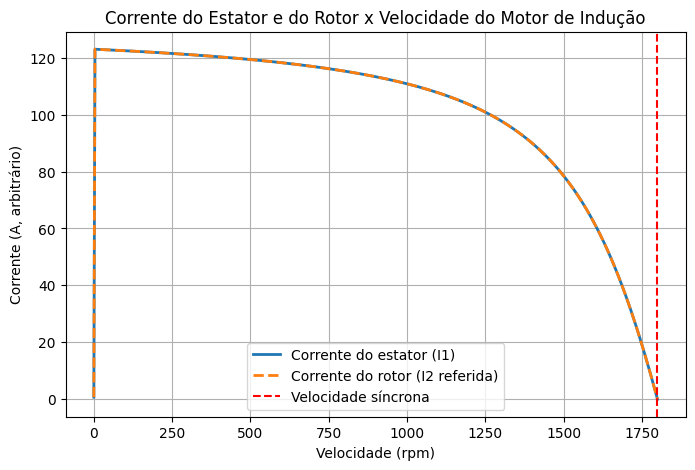

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do motor
V1 = 220       # tensão de fase (V)
R1 = 0.5       # resistência do estator (ohm)
X1 = 1.0       # reatância do estator (ohm)
R2 = 0.3       # resistência do rotor referida ao estator (ohm)
X2 = 0.6       # reatância do rotor referida ao estator (ohm)
f = 60         # frequência da rede (Hz)
P = 4          # número de polos

# Velocidade síncrona
Ns = 120 * f / P          # rpm

# Velocidade do rotor (0 a Ns)
N = np.linspace(0, Ns, 500)

# Escorregamento
s = (Ns - N) / Ns
s[0] = 0.001  # evita divisão por zero na partida

# Corrente do rotor referida ao estator
I2 = V1 / np.sqrt((R1 + R2/s)**2 + (X1 + X2)**2)

# Corrente do estator (aproximação)
I1 = I2  # para simplificação qualitativa

# Plot
plt.figure(figsize=(8,5))
plt.plot(N, I1, label="Corrente do estator (I1)", linewidth=2)
plt.plot(N, I2, label="Corrente do rotor (I2 referida)", linewidth=2, linestyle='--')
plt.axvline(Ns, color='red', linestyle='--', label='Velocidade síncrona')
plt.title("Corrente do Estator e do Rotor x Velocidade do Motor de Indução")
plt.xlabel("Velocidade (rpm)")
plt.ylabel("Corrente (A, arbitrário)")
plt.grid(True)
plt.legend()
plt.show()


/tmp/ipython-input-3557653811.py:26: RuntimeWarning: divide by zero encountered in divide
  Z2 = R2/s + 1j*X2
/tmp/ipython-input-3557653811.py:30: RuntimeWarning: invalid value encountered in multiply
  I1 = V1 / (Z1 + (Z2*Zm)/(Z2 + Zm))
/tmp/ipython-input-3557653811.py:30: RuntimeWarning: invalid value encountered in divide
  I1 = V1 / (Z1 + (Z2*Zm)/(Z2 + Zm))


(nan+nanj)
(nan+nanj)


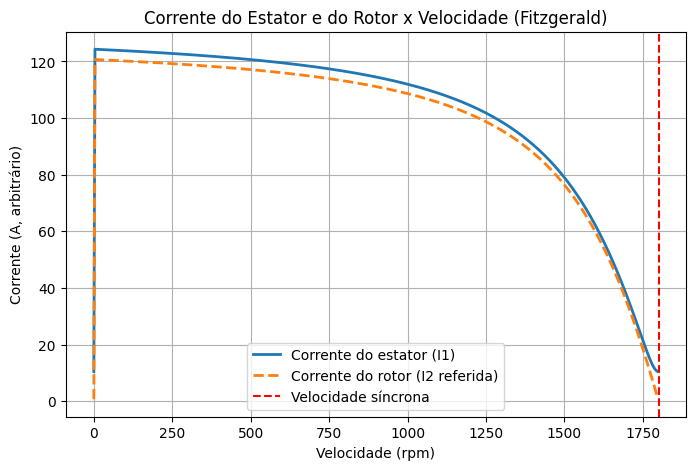

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do motor (exemplo)
V1 = 220       # tensão de fase (V)
R1 = 0.5       # resistência do estator (ohm)
X1 = 1.0       # reatância do estator (ohm)
R2 = 0.3       # resistência do rotor referida ao estator (ohm)
X2 = 0.6       # reatância do rotor referida ao estator (ohm)
Xm = 20        # reatância de magnetização (ohm)
f = 60         # frequência da rede (Hz)
P = 4          # número de polos

# Velocidade síncrona
Ns = 120 * f / P          # rpm

# Velocidade do rotor
N = np.linspace(0.001, Ns, 500)

# Escorregamento
s = (Ns - N) / Ns
s[0] = 0.001  # evita divisão por zero na partida

# Impedâncias
Z1 = R1 + 1j*X1
Z2 = R2/s + 1j*X2
Zm = 1j*Xm

# Corrente do estator
I1 = V1 / (Z1 + (Z2*Zm)/(Z2 + Zm))

print(np.max(I1))

# Corrente do rotor referida ao estator
I2 = I1 * (Zm / (Z2 + Zm))
print(np.max(I2))

# Plot
plt.figure(figsize=(8,5))
plt.plot(N, np.abs(I1), label="Corrente do estator (I1)", linewidth=2)
plt.plot(N, np.abs(I2), label="Corrente do rotor (I2 referida)", linewidth=2, linestyle='--')
plt.axvline(Ns, color='red', linestyle='--', label='Velocidade síncrona')
plt.title("Corrente do Estator e do Rotor x Velocidade (Fitzgerald)")
plt.xlabel("Velocidade (rpm)")
plt.ylabel("Corrente (A, arbitrário)")
plt.grid(True)
plt.legend()
plt.show()
